In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [191]:
# import csv file

houses=pd.read_csv('data/train.csv')



In [192]:
# check shape
houses.shape

(1460, 81)

In [193]:
# check a sample

houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,...,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,...,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,...,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,...,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [194]:
# take the Misc val from the sale price
houses['Sale_price_clean']=houses['SalePrice']-houses['MiscVal']

# create a column price per square feet, to compare houses from diferent sizes
houses['price_sqf']=houses['Sale_price_clean']/(houses['GrLivArea']+houses['GarageArea'])
# check range of values 
pd.set_option('display.max_columns', 40)
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Sale_price_clean,price_sqf
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,180877.706849,90.904227
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,79454.563764,21.129440
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,34900.000000,22.662890
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,129900.000000,77.935401
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,162950.000000,90.261434
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,214000.000000,102.217783
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,755000.000000,197.381672


In [195]:
#check how many have pools
houses['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [196]:
#check the houses with pools

houses.loc[houses['PoolArea']!=0]



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_price_clean,price_sqf
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,...,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000,235000,60.148451
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,...,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000,181000,100.948132
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,...,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000,171000,115.853659
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,...,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,745000,140.858385
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,...,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,160000,22.662890
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,...,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000,248000,74.074074
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,...,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970,274970,104.432207


In [197]:
#check partial sales

houses.loc[houses['SaleCondition']=='Partial']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_price_clean,price_sqf
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,...,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,345000,112.745098
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,...,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500,279500,119.751500
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,...,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300,325300,100.743264
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,...,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000,113000,77.823691
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,...,TA,TA,Y,192,0,37,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780,438780,122.359175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1376,20,RL,89.0,10991,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,...,TA,TA,Y,100,36,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,239000,239000,104.230266
1394,1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,...,TA,TA,Y,161,20,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578,246578,114.794227
1402,1403,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,...,TA,TA,Y,168,55,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,193879,193879,99.120143
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,...,TA,TA,Y,0,66,0,304,0,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617,394617,145.830377


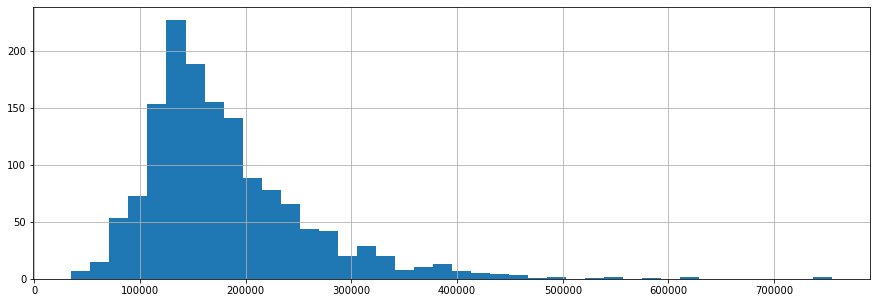

In [198]:
#figuring out our sample
fig =plt.figure(figsize=(15,5))


#distribution of our sample

houses['SalePrice'].hist(bins=40)

In [199]:
#confirm important varilables
print(houses.corr()['SalePrice'])

print(houses.corr()['price_sqf'])

Id                 -0.021917
MSSubClass         -0.084284
LotFrontage         0.351799
LotArea             0.263843
OverallQual         0.790982
OverallCond        -0.077856
YearBuilt           0.522897
YearRemodAdd        0.507101
MasVnrArea          0.477493
BsmtFinSF1          0.386420
BsmtFinSF2         -0.011378
BsmtUnfSF           0.214479
TotalBsmtSF         0.613581
1stFlrSF            0.605852
2ndFlrSF            0.319334
LowQualFinSF       -0.025606
GrLivArea           0.708624
BsmtFullBath        0.227122
BsmtHalfBath       -0.016844
FullBath            0.560664
HalfBath            0.284108
BedroomAbvGr        0.168213
KitchenAbvGr       -0.135907
TotRmsAbvGrd        0.533723
Fireplaces          0.466929
GarageYrBlt         0.486362
GarageCars          0.640409
GarageArea          0.623431
WoodDeckSF          0.324413
OpenPorchSF         0.315856
EnclosedPorch      -0.128578
3SsnPorch           0.044584
ScreenPorch         0.111447
PoolArea            0.092404
MiscVal       

In [200]:
# there isnt too much correlation with the sqf

In [201]:
houses_qt=houses[['MSZoning','Neighborhood','OverallQual','OverallCond',
                  'LotArea', 'TotalBsmtSF','GarageArea','GrLivArea',
                  'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                  'BedroomAbvGr','TotRmsAbvGrd',
                  'MoSold','YrSold','PoolArea',
                  'SaleCondition','SalePrice','Sale_price_clean','price_sqf']].copy()
houses_qt

,MSZoning,Neighborhood,OverallQual,OverallCond,LotArea,TotalBsmtSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,MoSold,YrSold,PoolArea,SaleCondition,SalePrice,Sale_price_clean,price_sqf
0,RL,CollgCr,7,5,8450,856,548,1710,1,0,2,1,3,8,2,2008,0,Normal,208500,208500,92.338353
1,RL,Veenker,6,8,9600,1262,460,1262,0,1,2,0,3,6,5,2007,0,Normal,181500,181500,105.400697
2,RL,CollgCr,7,5,11250,920,608,1786,1,0,2,1,3,6,9,2008,0,Normal,223500,223500,93.358396
3,RL,Crawfor,7,5,9550,756,642,1717,1,0,1,0,3,7,2,2006,0,Abnorml,140000,140000,59.347181
4,RL,NoRidge,8,5,14260,1145,836,2198,1,0,2,1,4,9,12,2008,0,Normal,250000,250000,82.399473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,6,5,7917,953,460,1647,0,0,2,1,3,7,8,2007,0,Normal,175000,175000,83.056478
1456,RL,NWAmes,6,6,13175,1542,500,2073,1,0,2,0,3,7,2,2010,0,Normal,210000,210000,81.616790
1457,RL,Crawfor,7,9,9042,1152,252,2340,0,0,2,0,4,9,5,2010,0,Normal,266500,264000,101.851852
1458,RL,NAmes,5,6,9717,1078,240,1078,1,0,1,0,2,5,4,2010,0,Normal,142125,142125,107.833839


In [202]:
houses_qt['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [203]:
# check the price per neiborhood 
norm_NH=(houses_qt.groupby(houses_qt['Neighborhood']).agg({'SalePrice':np.average,'price_sqf':np.average})
                                            .sort_values('SalePrice'))
norm_NH

,SalePrice,price_sqf
Neighborhood,,
MeadowV,98576.470588,84.666944
IDOTRR,100123.783784,69.135979
BrDale,104493.750000,73.697506
BrkSide,124834.051724,85.716717
Edwards,128219.700000,82.383743
OldTown,128225.300885,71.671488
Sawyer,136793.135135,87.873139
Blueste,137500.000000,74.264297
SWISU,142591.360000,71.714718


In [204]:
#confirm the expensive areas with google.maps
#the top high 4 neiborhoods seem to be in a upper class area
#the top bottom  seem to be a student area and an area far away from the city



# add a columm with a variable that replicates the inexpensive and expensive areas

# normalizing the price
norm_NH=norm_NH.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))+1)

# add our adjust price variable with an dictionary and aply to the Neighborhood and create a new collum
adjust_area=norm_NH['SalePrice'].to_dict()

houses_qt['adjust_area']=houses_qt['Neighborhood'].map(adjust_area)


houses_qt['lote_adjust']=houses_qt['adjust_area']*houses_qt['LotArea']

houses_qt

,MSZoning,Neighborhood,OverallQual,OverallCond,LotArea,TotalBsmtSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,MoSold,YrSold,PoolArea,SaleCondition,SalePrice,Sale_price_clean,price_sqf,adjust_area,lote_adjust
0,RL,CollgCr,7,5,8450,856,548,1710,1,0,2,1,3,8,2,2008,0,Normal,208500,208500,92.338353,1.059146,8949.781813
1,RL,Veenker,6,8,9600,1262,460,1262,0,1,2,0,3,6,5,2007,0,Normal,181500,181500,105.400697,1.231532,11822.702577
2,RL,CollgCr,7,5,11250,920,608,1786,1,0,2,1,3,6,9,2008,0,Normal,223500,223500,93.358396,1.059146,11915.389988
3,RL,Crawfor,7,5,9550,756,642,1717,1,0,1,0,3,7,2,2006,0,Abnorml,140000,140000,59.347181,1.112623,10625.545032
4,RL,NoRidge,8,5,14260,1145,836,2198,1,0,2,1,4,9,12,2008,0,Normal,250000,250000,82.399473,1.639284,23376.183377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,6,5,7917,953,460,1647,0,0,2,1,3,7,8,2007,0,Normal,175000,175000,83.056478,1.037554,8214.312124
1456,RL,NWAmes,6,6,13175,1542,500,2073,1,0,2,0,3,7,2,2010,0,Normal,210000,210000,81.616790,1.021482,13458.026515
1457,RL,Crawfor,7,9,9042,1152,252,2340,0,0,2,0,4,9,5,2010,0,Normal,266500,264000,101.851852,1.112623,10060.332794
1458,RL,NAmes,5,6,9717,1078,240,1078,1,0,1,0,2,5,4,2010,0,Normal,142125,142125,107.833839,0.838974,8152.315106


In [205]:
#check big lotes sales

houses_qt.loc[houses_qt['lote_adjust']>100000]

,MSZoning,Neighborhood,OverallQual,OverallCond,LotArea,TotalBsmtSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,MoSold,YrSold,PoolArea,SaleCondition,SalePrice,Sale_price_clean,price_sqf,adjust_area,lote_adjust
249,RL,ClearCr,6,7,159000,1444,389,2144,0,1,2,0,4,7,6,2007,0,Normal,277000,276500,109.159100,1.120821,178210.517184
313,RL,Timber,7,5,215245,2136,513,2036,2,0,2,0,3,8,6,2009,0,Normal,375000,375000,147.116516,1.246210,268240.514073
335,RL,Timber,5,6,164660,1499,529,1786,2,0,2,0,3,7,8,2008,0,Normal,228950,228250,98.596112,1.246210,205200.971206
706,RL,ClearCr,7,5,115149,1643,739,1824,1,0,2,0,2,5,6,2007,0,Normal,302000,302000,117.830667,1.120821,129061.401530


In [206]:
#take out big lotes sales

houses_qt=houses_qt.loc[houses_qt['lote_adjust']<100000]



In [207]:
# check the null hypoteses if the ratio between bedrooms and bathrooms penalize the price

houses_qt['bath_ratio'] =(houses_qt['BsmtFullBath']+houses_qt['BsmtHalfBath']+
                          houses_qt['HalfBath']+houses_qt['FullBath'])/houses_qt['BedroomAbvGr']
houses_qt['bath_ratio'].value_counts()

<ipython-input-207-dd36c3d7ba04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_qt['bath_ratio'] =(houses_qt['BsmtFullBath']+houses_qt['BsmtHalfBath']+


1.000000    504
0.666667    312
0.500000    180
0.333333    108
1.333333     94
1.500000     83
0.750000     78
2.000000     40
3.000000     17
0.400000      9
0.250000      6
inf           6
0.800000      5
1.250000      5
0.600000      4
1.666667      2
0.200000      2
4.000000      1
Name: bath_ratio, dtype: int64

In [208]:
# drop 0 and inf 
# drop 0 and inf 

houses_qt=houses_qt.loc[(houses_qt['bath_ratio']>0.1)& (houses_qt['bath_ratio']<10)]


In [209]:
import scipy.stats


print(len(houses_qt.loc[houses_qt['bath_ratio'] < 0.76]))
print(len(houses_qt.loc[houses_qt['bath_ratio'] >= 0.76]))

scipy.stats.ttest_ind(houses_qt.loc[houses_qt['bath_ratio'] < 1,'SalePrice'],
                        houses_qt.loc[houses_qt['bath_ratio'] >= 1,'SalePrice'],
                        equal_var=False)
# very low p-value 


699
751


Ttest_indResult(statistic=-14.498898486036552, pvalue=3.332540156040846e-44)

In [210]:
#create datetime column with year and month
houses_qt=houses_qt.assign(date=pd.to_datetime(houses_qt['YrSold'].astype(str)+'-'+houses_qt['MoSold'].astype(str)))

# create quartal column
houses_qt['quarter'] = pd.PeriodIndex(houses_qt.date, freq='Q').astype(str)

#drop year and month

houses_qt=houses_qt.drop(labels=['MoSold'], axis=1)



In [211]:
houses_qt

,MSZoning,Neighborhood,OverallQual,OverallCond,LotArea,TotalBsmtSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,PoolArea,SaleCondition,SalePrice,Sale_price_clean,price_sqf,adjust_area,lote_adjust,bath_ratio,date,quarter
0,RL,CollgCr,7,5,8450,856,548,1710,1,0,2,1,3,8,2008,0,Normal,208500,208500,92.338353,1.059146,8949.781813,1.333333,2008-02-01,2008Q1
1,RL,Veenker,6,8,9600,1262,460,1262,0,1,2,0,3,6,2007,0,Normal,181500,181500,105.400697,1.231532,11822.702577,1.000000,2007-05-01,2007Q2
2,RL,CollgCr,7,5,11250,920,608,1786,1,0,2,1,3,6,2008,0,Normal,223500,223500,93.358396,1.059146,11915.389988,1.333333,2008-09-01,2008Q3
3,RL,Crawfor,7,5,9550,756,642,1717,1,0,1,0,3,7,2006,0,Abnorml,140000,140000,59.347181,1.112623,10625.545032,0.666667,2006-02-01,2006Q1
4,RL,NoRidge,8,5,14260,1145,836,2198,1,0,2,1,4,9,2008,0,Normal,250000,250000,82.399473,1.639284,23376.183377,1.000000,2008-12-01,2008Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,6,5,7917,953,460,1647,0,0,2,1,3,7,2007,0,Normal,175000,175000,83.056478,1.037554,8214.312124,1.000000,2007-08-01,2007Q3
1456,RL,NWAmes,6,6,13175,1542,500,2073,1,0,2,0,3,7,2010,0,Normal,210000,210000,81.616790,1.021482,13458.026515,1.000000,2010-02-01,2010Q1
1457,RL,Crawfor,7,9,9042,1152,252,2340,0,0,2,0,4,9,2010,0,Normal,266500,264000,101.851852,1.112623,10060.332794,0.500000,2010-05-01,2010Q2
1458,RL,NAmes,5,6,9717,1078,240,1078,1,0,1,0,2,5,2010,0,Normal,142125,142125,107.833839,0.838974,8152.315106,1.000000,2010-04-01,2010Q2


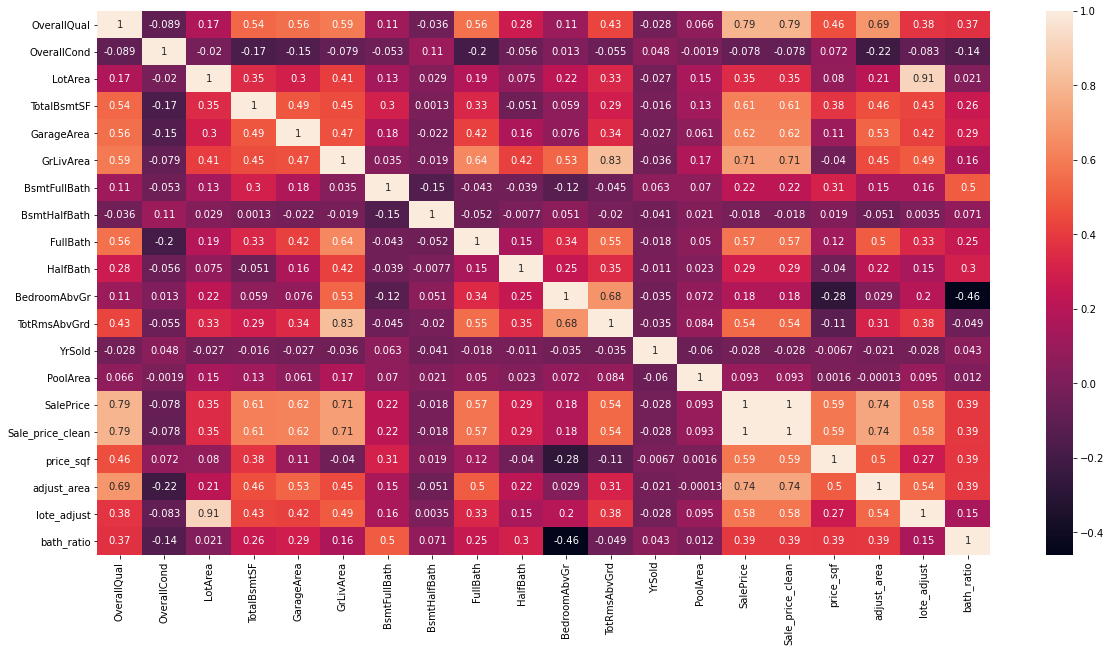

In [212]:
plt.figure(figsize=(20,10))

sns.heatmap(houses_qt.corr(),annot=True)

Text(0, 0.5, 'number of sales')

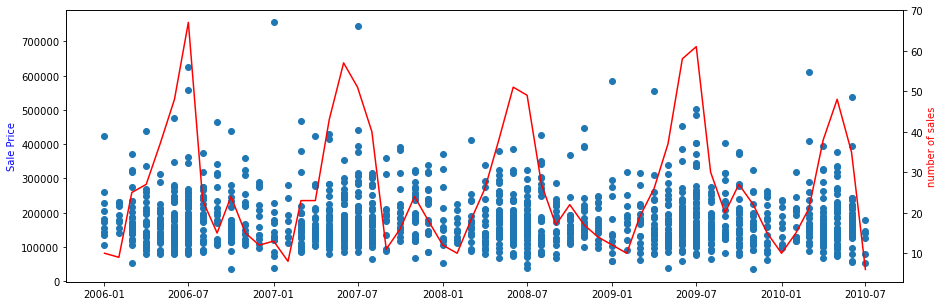

In [213]:
# price sales per time
fig, ax1 = plt.subplots(figsize=(15,5))

plt.scatter(houses_qt['date'],houses_qt['SalePrice'], )
ax1.set_ylabel('Sale Price',color='b')

# sales per time
ax2 = ax1.twinx() 

sales=houses_qt.groupby('date').count()

ax2.plot(sales['SalePrice'], color='r')
ax2.set_ylabel('number of sales',color='r')


In [214]:
# cleary there is seasonality of sales

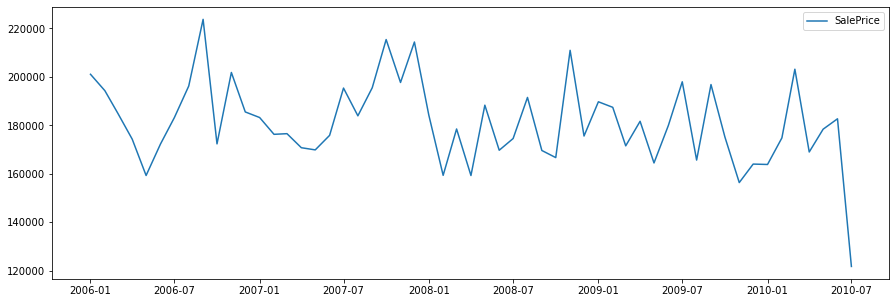

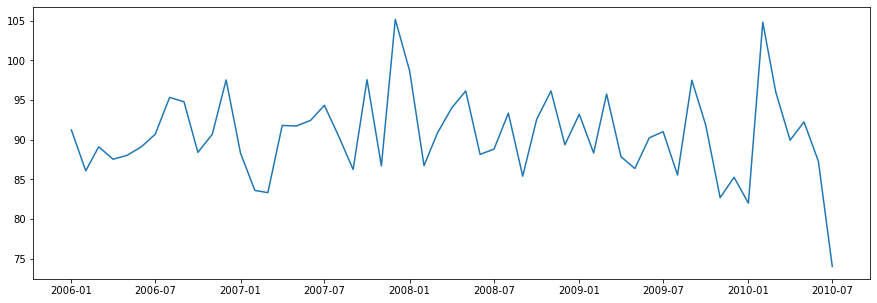

In [215]:
#plot the average price through time

priceavg=houses_qt.groupby('date').agg({'SalePrice':np.average,'price_sqf':np.average})

fig =plt.figure(figsize=(15,5))
plt.plot(priceavg['SalePrice'])
plt.legend(priceavg)
fig =plt.figure(figsize=(15,5))
plt.plot(priceavg['price_sqf'])

# seems that the market is seasonal, around the 3rd 4th month of the year we have a gap of prices

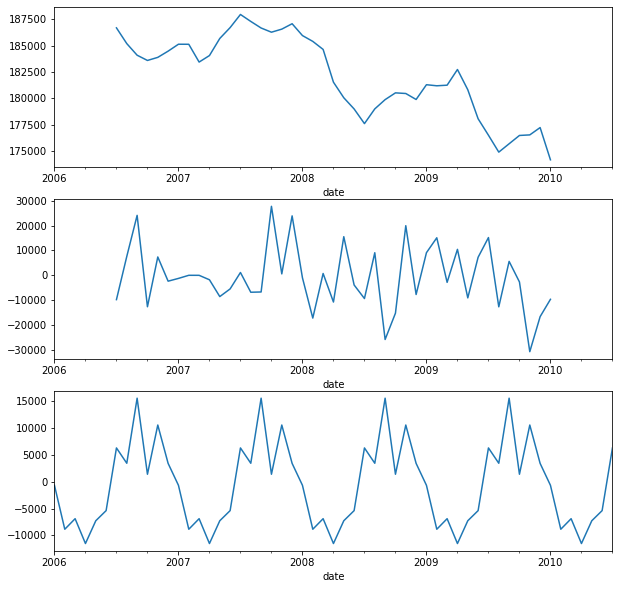

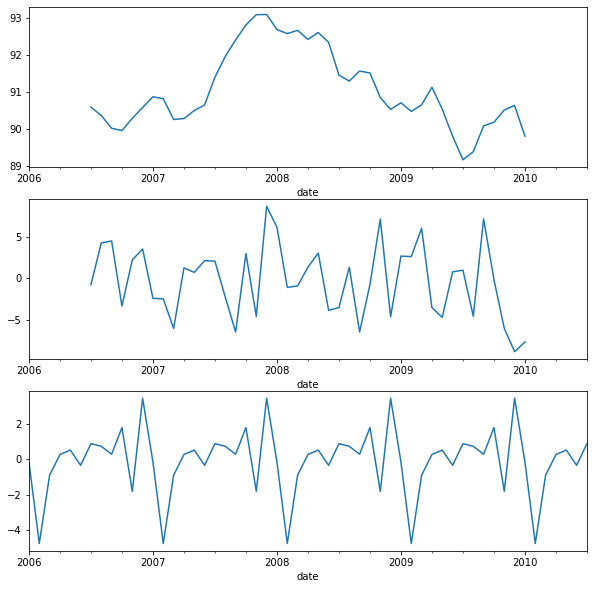

In [216]:
#apply time series to our sample to find the evolution of prices

import statsmodels.api as sm

# for sale price

res = sm.tsa.seasonal_decompose(priceavg['SalePrice'])
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,10))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)



# for sqf price
res2 = sm.tsa.seasonal_decompose(priceavg['price_sqf'])
fig2, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,10))

res2.trend.plot(ax=ax1)
res2.resid.plot(ax=ax2)
res2.seasonal.plot(ax=ax3)



In [217]:


houses_qt

df = sm.add_constant(houses_qt)
df

,const,MSZoning,Neighborhood,OverallQual,OverallCond,LotArea,TotalBsmtSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,PoolArea,SaleCondition,SalePrice,Sale_price_clean,price_sqf,adjust_area,lote_adjust,bath_ratio,date,quarter
0,1.0,RL,CollgCr,7,5,8450,856,548,1710,1,0,2,1,3,8,2008,0,Normal,208500,208500,92.338353,1.059146,8949.781813,1.333333,2008-02-01,2008Q1
1,1.0,RL,Veenker,6,8,9600,1262,460,1262,0,1,2,0,3,6,2007,0,Normal,181500,181500,105.400697,1.231532,11822.702577,1.000000,2007-05-01,2007Q2
2,1.0,RL,CollgCr,7,5,11250,920,608,1786,1,0,2,1,3,6,2008,0,Normal,223500,223500,93.358396,1.059146,11915.389988,1.333333,2008-09-01,2008Q3
3,1.0,RL,Crawfor,7,5,9550,756,642,1717,1,0,1,0,3,7,2006,0,Abnorml,140000,140000,59.347181,1.112623,10625.545032,0.666667,2006-02-01,2006Q1
4,1.0,RL,NoRidge,8,5,14260,1145,836,2198,1,0,2,1,4,9,2008,0,Normal,250000,250000,82.399473,1.639284,23376.183377,1.000000,2008-12-01,2008Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,RL,Gilbert,6,5,7917,953,460,1647,0,0,2,1,3,7,2007,0,Normal,175000,175000,83.056478,1.037554,8214.312124,1.000000,2007-08-01,2007Q3
1456,1.0,RL,NWAmes,6,6,13175,1542,500,2073,1,0,2,0,3,7,2010,0,Normal,210000,210000,81.616790,1.021482,13458.026515,1.000000,2010-02-01,2010Q1
1457,1.0,RL,Crawfor,7,9,9042,1152,252,2340,0,0,2,0,4,9,2010,0,Normal,266500,264000,101.851852,1.112623,10060.332794,0.500000,2010-05-01,2010Q2
1458,1.0,RL,NAmes,5,6,9717,1078,240,1078,1,0,1,0,2,5,2010,0,Normal,142125,142125,107.833839,0.838974,8152.315106,1.000000,2010-04-01,2010Q2


In [218]:


#building the model and see the coeficients



y = df['SalePrice']
X = df[['const','TotalBsmtSF','OverallQual','GarageArea','GrLivArea','OverallCond', 'bath_ratio','adjust_area']]
lin_reg = sm.OLS(y, X).fit()

In [219]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     877.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:00:04   Log-Likelihood:                -17208.
No. Observations:                1450   AIC:                         3.443e+04
Df Residuals:                    1442   BIC:                         3.447e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.61e+05   6880.010    -23.403      0.000   -1.75e+05   -1.48e+05
TotalBsmtSF    25.7168      2.610      9.853      0.000      20.597      30.837
OverallQual  1.442e+04   1070.227     13.478      0.000    1.23e+04    1.65e+04
GarageArea     38.4418      5.518      6.966      0.000      27.617      49.267
GrLivArea      46.3032      2.235     20.719      0.000      41.919      50.687
OverallCond  5916.0569    849.417      6.965      0.000    4249.831    7582.283
bath_ratio   1.386e+04   2319.528      5.973      0.000    9305.683    1.84e+04
adjust_area  9.391e+04   5370.904     17.485      0.000    8.34e+04    1.04e+05
==============================================================================
Omnibus:                      410.017   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40957.123
Skew:                           0.020   Prob(JB):                         0.00
Kurtosis:                      29.037   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
df[1448:1449]

,const,MSZoning,Neighborhood,OverallQual,OverallCond,LotArea,TotalBsmtSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,PoolArea,SaleCondition,SalePrice,Sale_price_clean,price_sqf,adjust_area,lote_adjust,bath_ratio,date,quarter
1458,1.0,RL,NAmes,5,6,9717,1078,240,1078,1,0,1,0,2,5,2010,0,Normal,142125,142125,107.833839,0.838974,8152.315106,1.0,2010-04-01,2010Q2


In [221]:
#model more logical for me
#building the model and see the coeficients
# almost all the variables should have a positice effect!!
# if negative coeficcient one must ask why , negative coeficients for quality and condition and sqf dont make sense!!


y = df['SalePrice']
X = df[['const','TotalBsmtSF','OverallQual','GrLivArea','GarageArea','lote_adjust']]
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:00:06   Log-Likelihood:                -17310.
No. Observations:                1450   AIC:                         3.463e+04
Df Residuals:                    1444   BIC:                         3.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.525e+04   4451.372    -21.398      0.000   -1.04e+05   -8.65e+04
TotalBsmtSF    21.9866      2.826      7.780      0.000      16.443      27.530
OverallQual  2.531e+04    993.173     25.484      0.000    2.34e+04    2.73e+04
GrLivArea      36.2662      2.492     14.554      0.000      31.378      41.154
GarageArea     46.4281      5.855      7.929      0.000      34.942      57.914
lote_adjust     2.0842      0.167     12.493      0.000       1.757       2.411
==============================================================================
Omnibus:                      591.120   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72890.093
Skew:                          -0.864   Prob(JB):                         0.00
Kurtosis:                      37.691   Cond. No.                     5.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
#super fitting

#other model
#building the model and see the coeficients
# almost all the variables should have a positice effect!!
# if negative coeficcient one must ask why , negative coeficients for quality and condition dont make sense!!


y = df['SalePrice']
X = df[['TotalBsmtSF','OverallQual','GrLivArea','GarageArea','adjust_area']]
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              5571.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):                        0.00
Time:                        22:00:07   Log-Likelihood:                         -17553.
No. Observations:                1450   AIC:                                  3.512e+04
Df Residuals:                    1445   BIC:                                  3.514e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TotalBsmtSF    25.5994      3.286      7.791      0.000      19.154      32.045
OverallQual  3368.0166   1199.758      2.807      0.005    1014.564    5721.470
GrLivArea      40.2251      2.803     14.349      0.000      34.726      45.724
GarageArea     60.8942      6.894      8.832      0.000      47.370      74.418
adjust_area  4.925e+04   6300.861      7.816      0.000    3.69e+04    6.16e+04
==============================================================================
Omnibus:                      732.859   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16346.099
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                      19.027   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
#see relations in Sale price

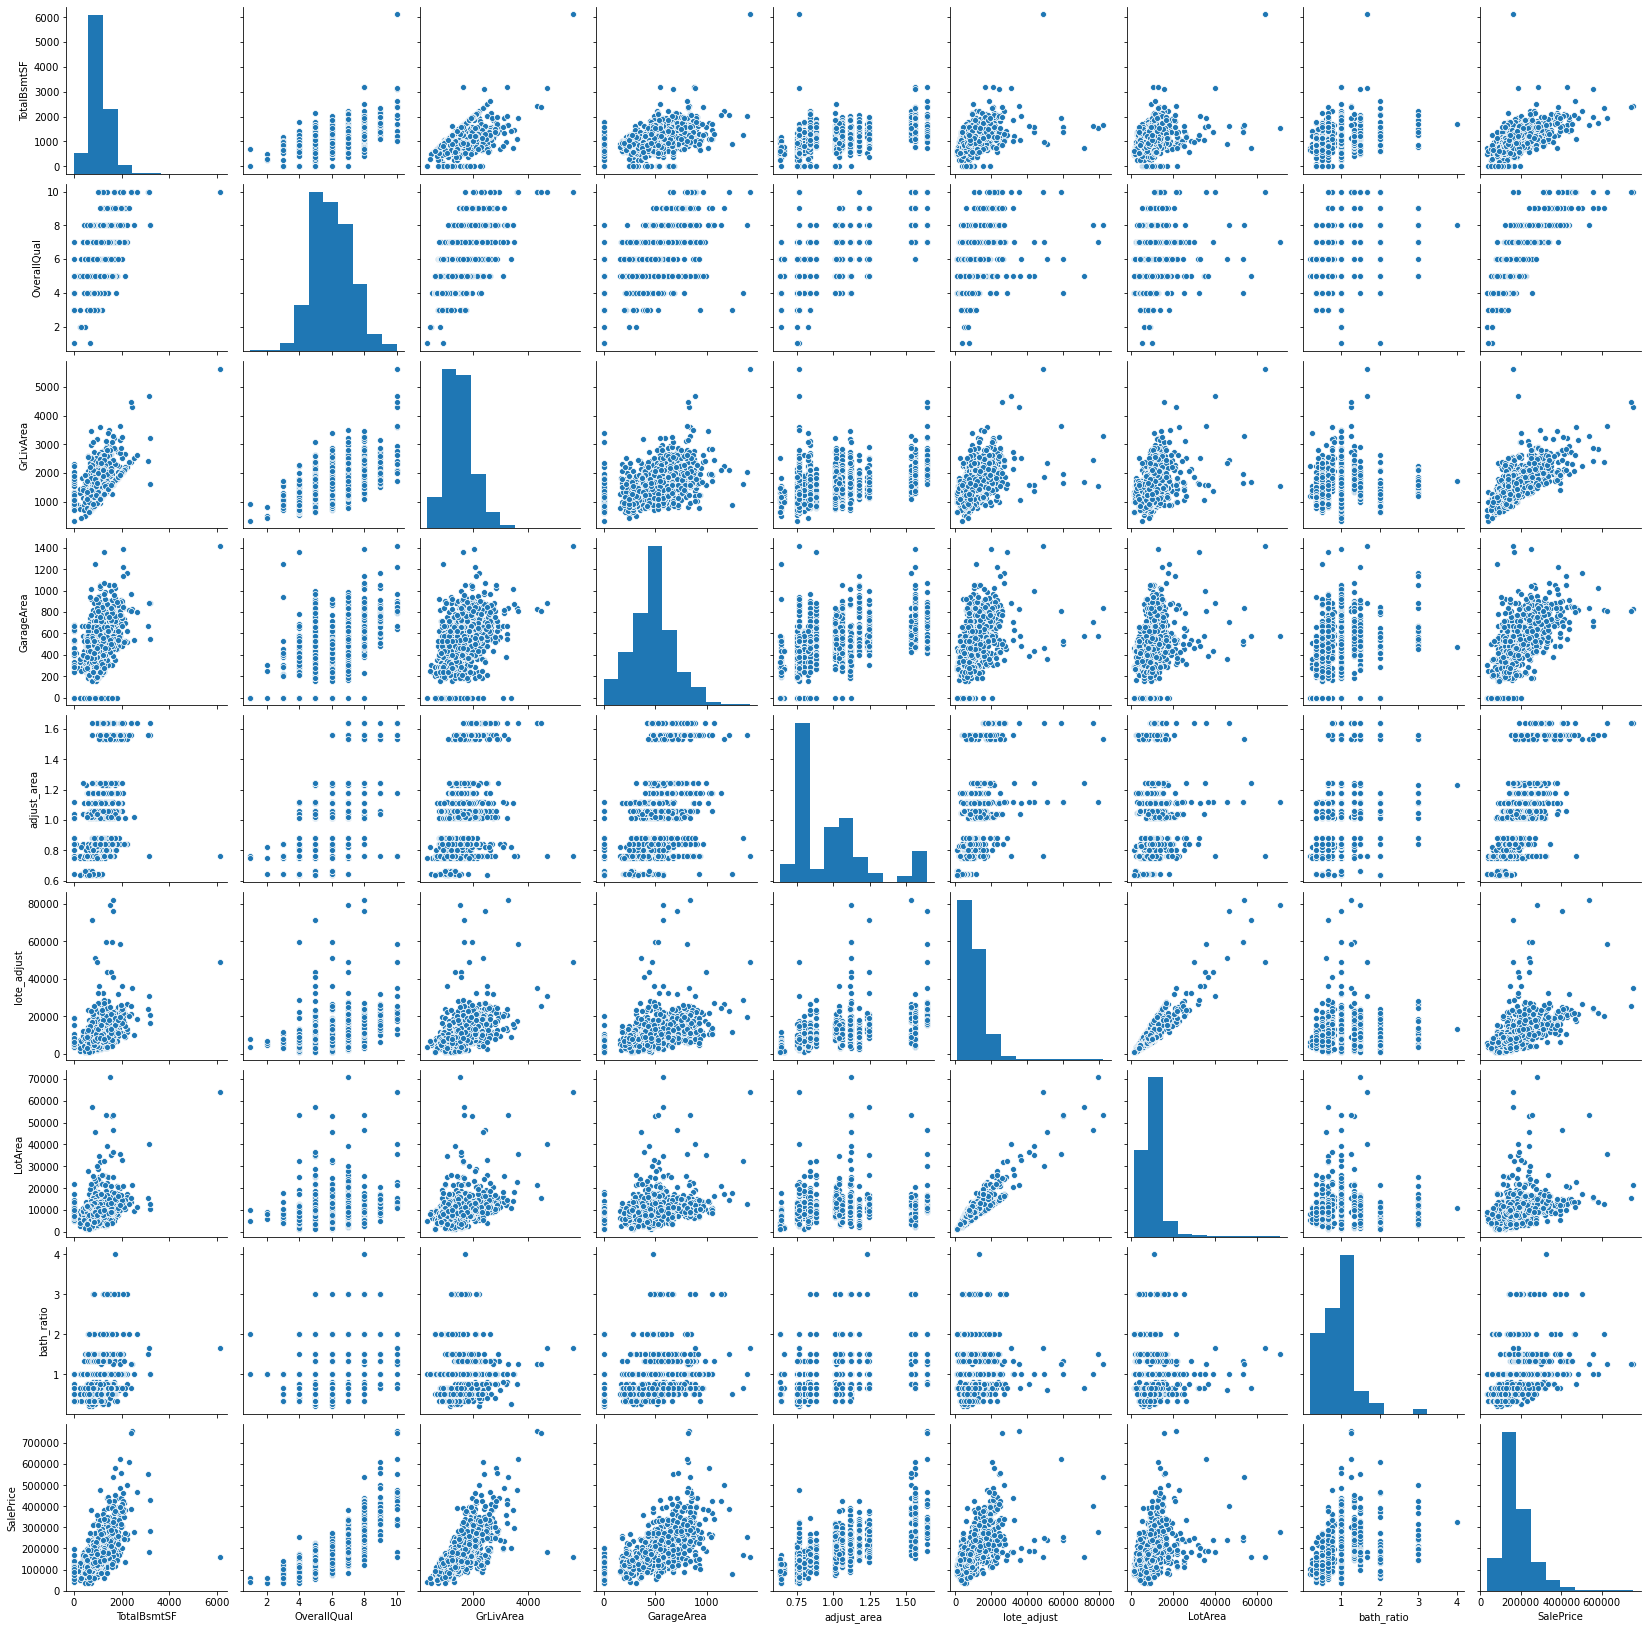

In [224]:
sns.pairplot(df[['TotalBsmtSF','OverallQual','GrLivArea','GarageArea',
                 'adjust_area','lote_adjust','LotArea','bath_ratio','SalePrice']])